In [1]:
# install slim version (default)
!pip install pycaret

In [2]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.3.2'

Install Analysis Extras for Explainable AI

In [3]:
!pip install pycaret[analysis]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 39.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.8/287.8 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# **Principal Component Analysis**

Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  2.1.4
Seaborn version:  0.13.2


**Dataset**

In [ ]:
import pandas as pd

# Read the CSV file from the raw GitHub link
df = pd.read_csv('https://raw.githubusercontent.com/DivineIbuchim/INSE_6220/e82e5ccf1052efa7d677882053d2d831f5399a13/cleaned_merged_heart_dataset.csv')
df.head(25)


,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1888 non-null   int64  
 1   sex       1888 non-null   int64  
 2   cp        1888 non-null   int64  
 3   trestbps  1888 non-null   int64  
 4   chol      1888 non-null   int64  
 5   fbs       1888 non-null   int64  
 6   restecg   1888 non-null   int64  
 7   thalachh  1888 non-null   int64  
 8   exang     1888 non-null   int64  
 9   oldpeak   1888 non-null   float64
 10  slope     1888 non-null   int64  
 11  ca        1888 non-null   int64  
 12  thal      1888 non-null   int64  
 13  target    1888 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 206.6 KB


In [ ]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  1286


In [ ]:
# Remove duplicate rows and keep the first occurrence
df = df.drop_duplicates()

# Check the result
print("Number of duplicated rows after removal:", df.duplicated().sum())
print("Dataframe shape after removing duplicates:", df.shape)


Number of duplicated rows after removal: 0
Dataframe shape after removing duplicates: (602, 14)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 602 entries, 0 to 1887
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       602 non-null    int64  
 1   sex       602 non-null    int64  
 2   cp        602 non-null    int64  
 3   trestbps  602 non-null    int64  
 4   chol      602 non-null    int64  
 5   fbs       602 non-null    int64  
 6   restecg   602 non-null    int64  
 7   thalachh  602 non-null    int64  
 8   exang     602 non-null    int64  
 9   oldpeak   602 non-null    float64
 10  slope     602 non-null    int64  
 11  ca        602 non-null    int64  
 12  thal      602 non-null    int64  
 13  target    602 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 70.5 KB


In [ ]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

In [ ]:
sns.pairplot(df, hue='target')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

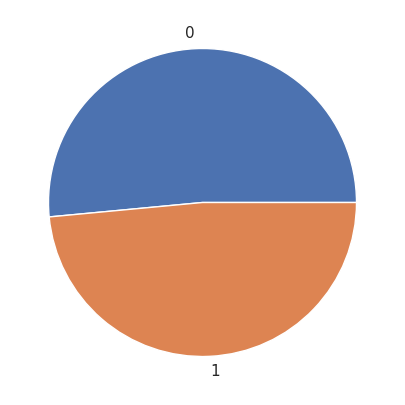

In [ ]:
y =df['target']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [ ]:
X = df.drop(columns=['target'])
X.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2


In [ ]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,602.0,54.473422,9.039576,29.0,48.0,55.0,61.00,77.0
sex,602.0,0.684385,0.465147,0.0,0.0,1.0,1.00,1.0
cp,602.0,1.961794,1.486557,0.0,0.0,2.0,3.00,4.0
trestbps,602.0,131.637874,17.509164,94.0,120.0,130.0,140.00,200.0
chol,602.0,248.450166,51.552293,126.0,212.0,244.0,276.75,564.0
fbs,602.0,0.151163,0.358505,0.0,0.0,0.0,0.00,1.0
restecg,602.0,0.744186,0.812347,0.0,0.0,1.0,1.00,2.0
thalachh,602.0,149.270764,23.122436,71.0,132.0,152.5,165.75,202.0
exang,602.0,0.337209,0.473150,0.0,0.0,0.0,1.00,1.0
oldpeak,602.0,1.073256,1.156289,0.0,0.0,0.8,1.80,6.2


**Standardize the Data**

In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal
0,0.944034,0.679091,0.698977,0.763785,-0.299948,2.369680,-0.916855,0.031564,-0.713283,1.061815,-2.362915,-0.720599,-1.307388
1,-1.934599,0.679091,0.025722,-0.093622,0.030088,-0.421998,0.315169,1.633072,-0.713283,2.100480,-2.362915,-0.720599,-0.759686
2,-1.491732,-1.472556,-0.647532,-0.093622,-0.862952,-0.421998,-0.916855,0.983812,-0.713283,0.282815,0.844469,-0.720599,-0.759686
3,0.169018,0.679091,-0.647532,-0.665226,-0.241706,-0.421998,0.315169,1.243516,-0.713283,-0.236518,0.844469,-0.720599,-0.759686
4,0.279734,-1.472556,-1.320787,-0.665226,2.049135,-0.421998,0.315169,0.594256,1.401969,-0.409629,0.844469,-0.720599,-0.759686
5,0.279734,0.679091,-1.320787,0.477983,-1.095918,-0.421998,0.315169,-0.055004,-0.713283,-0.582740,-0.759223,-0.720599,-1.307388
6,0.169018,-1.472556,-0.647532,0.477983,0.884300,-0.421998,-0.916855,0.161416,-0.713283,0.196260,-0.759223,-0.720599,-0.759686
7,-1.159582,0.679091,-0.647532,-0.665226,0.282469,-0.421998,0.315169,1.027096,-0.713283,-0.928962,0.844469,-0.720599,-0.211984
8,-0.273849,0.679091,0.025722,2.307117,-0.960021,2.369680,0.315169,0.550972,-0.713283,-0.496184,0.844469,-0.720599,-0.211984
9,0.279734,0.679091,0.025722,1.049587,-1.561852,-0.421998,0.315169,1.070380,-0.713283,0.455926,0.844469,-0.720599,-0.759686


In [ ]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,602.0,1.283580e-16,1.000832,-2.820332,-0.716716,0.058301,0.722601,2.494067
sex,602.0,-3.393373e-17,1.000832,-1.472556,-1.472556,0.679091,0.679091,0.679091
cp,602.0,4.721214e-17,1.000832,-1.320787,-1.320787,0.025722,0.698977,1.372232
trestbps,602.0,1.799963e-16,1.000832,-2.151398,-0.665226,-0.093622,0.477983,3.907610
chol,602.0,-2.301592e-16,1.000832,-2.377237,-0.707640,-0.086395,0.549410,6.126056
fbs,602.0,-4.426138e-18,1.000832,-0.421998,-0.421998,-0.421998,-0.421998,2.369680
restecg,602.0,0.000000e+00,1.000832,-0.916855,-0.916855,0.315169,0.315169,1.547194
thalachh,602.0,2.124546e-16,1.000832,-3.387872,-0.747548,0.139774,0.713287,2.282332
exang,602.0,5.901518e-18,1.000832,-0.713283,-0.713283,-0.713283,1.401969,1.401969
oldpeak,602.0,-5.311366e-17,1.000832,-0.928962,-0.928962,-0.236518,0.629037,4.437479


**Observations and variables**

In [ ]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

<ipython-input-17-4e6743a6f098>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45);


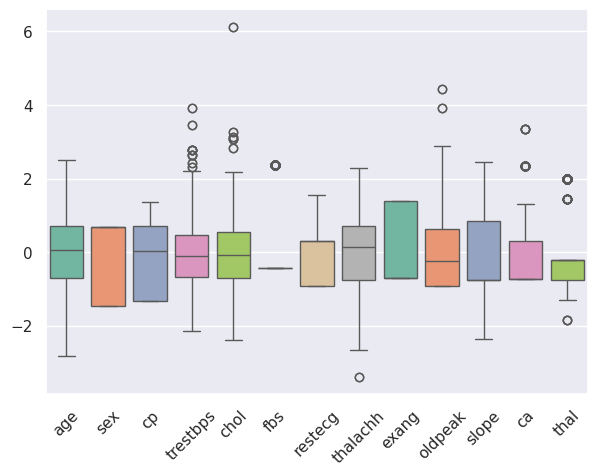

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

<ipython-input-18-736b6aedc2e2>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45);


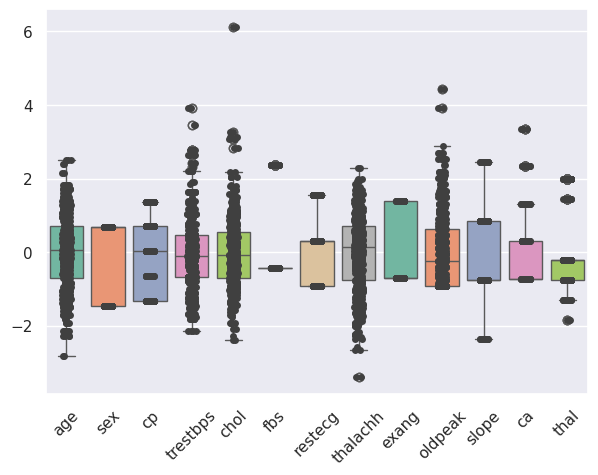

In [ ]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

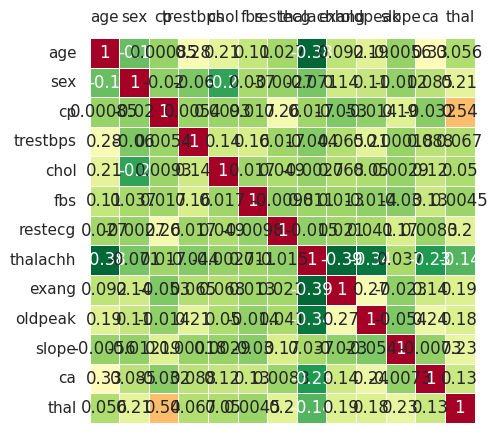

In [ ]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

# **Applying PCA**

Text(0, 0.5, '$Z_2$')

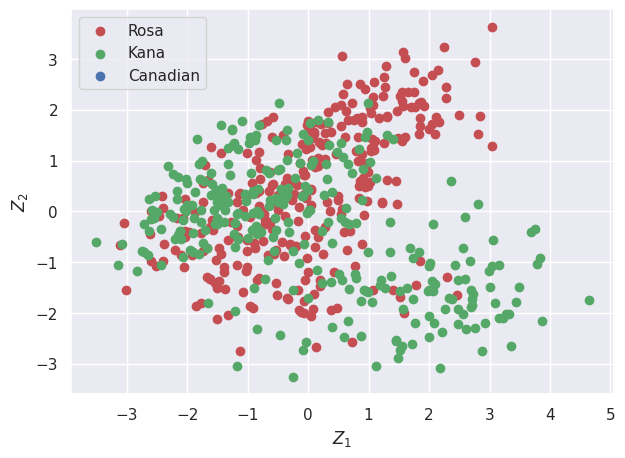

In [ ]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Rosa = np.where(y == 0)
idx_Kana = np.where(y == 1)
idx_Canadian = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

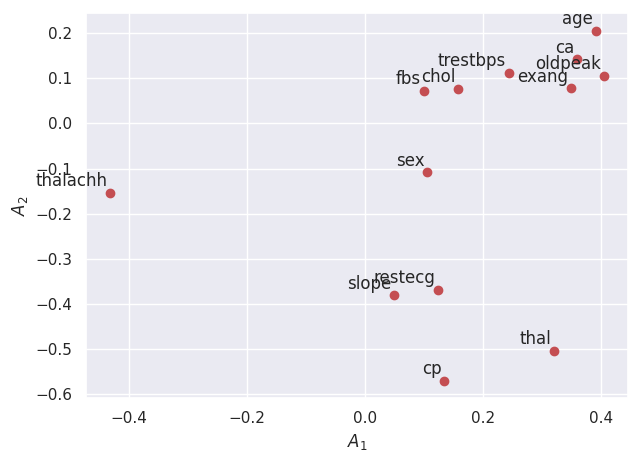

In [ ]:
A = pca.components_.T

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

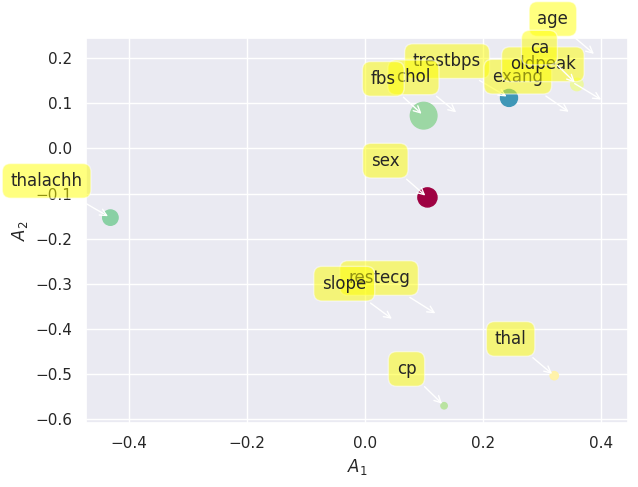

In [ ]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

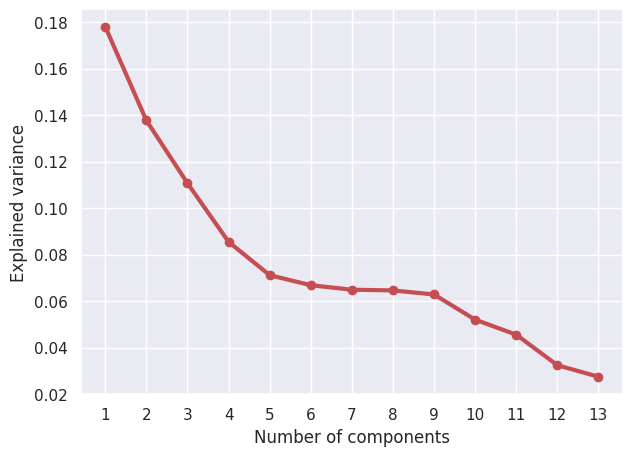

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

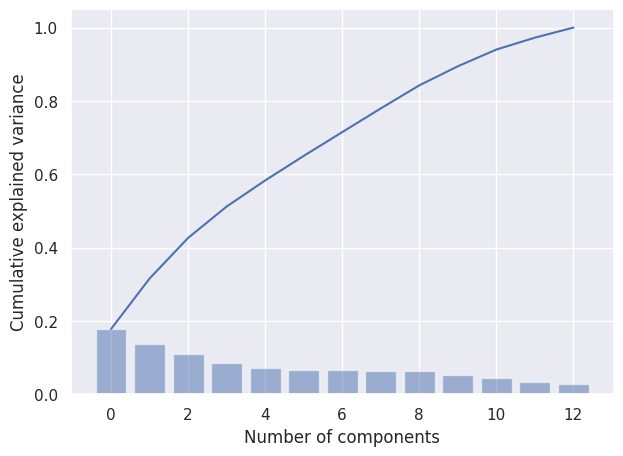

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

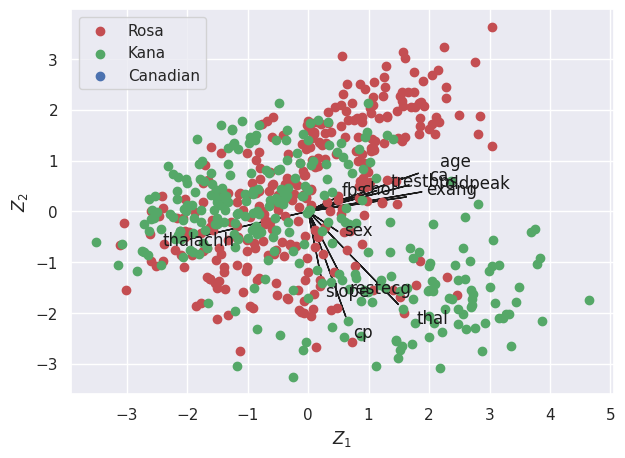

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend(loc='upper left')

# Using PCA Library

In [ ]:
!pip install pca

In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [13] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [12] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [13] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[12]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [ ]:
out['PC']

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,0.168689,1.804563,0.269833,2.460546,1.142842,0.629785,1.758429,0.623615,-0.571970,-0.034859,1.396745,-0.509889
1,-1.428478,0.455526,-1.093124,0.302829,2.319006,1.097083,1.176826,0.404141,2.122367,1.312204,0.746684,-0.240184
2,-2.163265,0.235856,0.125316,-0.423850,0.428791,-1.091930,-0.275498,-0.785655,-0.249547,1.678685,-0.092974,0.117705
3,-1.495654,-0.222139,-0.106986,-0.039586,-0.433212,-0.744889,-0.556356,-0.076929,0.865256,-0.487558,0.660473,-0.903555
4,-0.457879,0.838698,1.300662,-2.026655,0.147737,0.381173,-2.238167,0.697867,-0.262631,0.067124,0.070506,-0.813552
...,...,...,...,...,...,...,...,...,...,...,...,...
597,-0.714083,-0.258208,-0.142468,-0.417922,-0.569707,-0.580442,-0.560503,0.002746,0.229846,-1.032952,0.833715,0.400925
598,-0.765708,1.725122,-1.049733,1.716334,0.482428,-0.316005,-1.116841,2.308959,-0.585686,0.252014,0.172152,-0.586328
599,1.039862,1.191701,-1.311960,-0.113202,-0.008203,-1.259303,-1.030101,-0.767887,-0.208988,-0.134410,-0.360867,-0.596050
600,-0.924728,0.563725,0.303753,0.793057,-0.159161,-1.024800,-0.615398,-1.357781,0.491359,-0.837978,-0.632494,0.377686


**Scatter plot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '12 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (17.8% expl.var)', ylabel='PC2 (13.7% expl.var)'>)

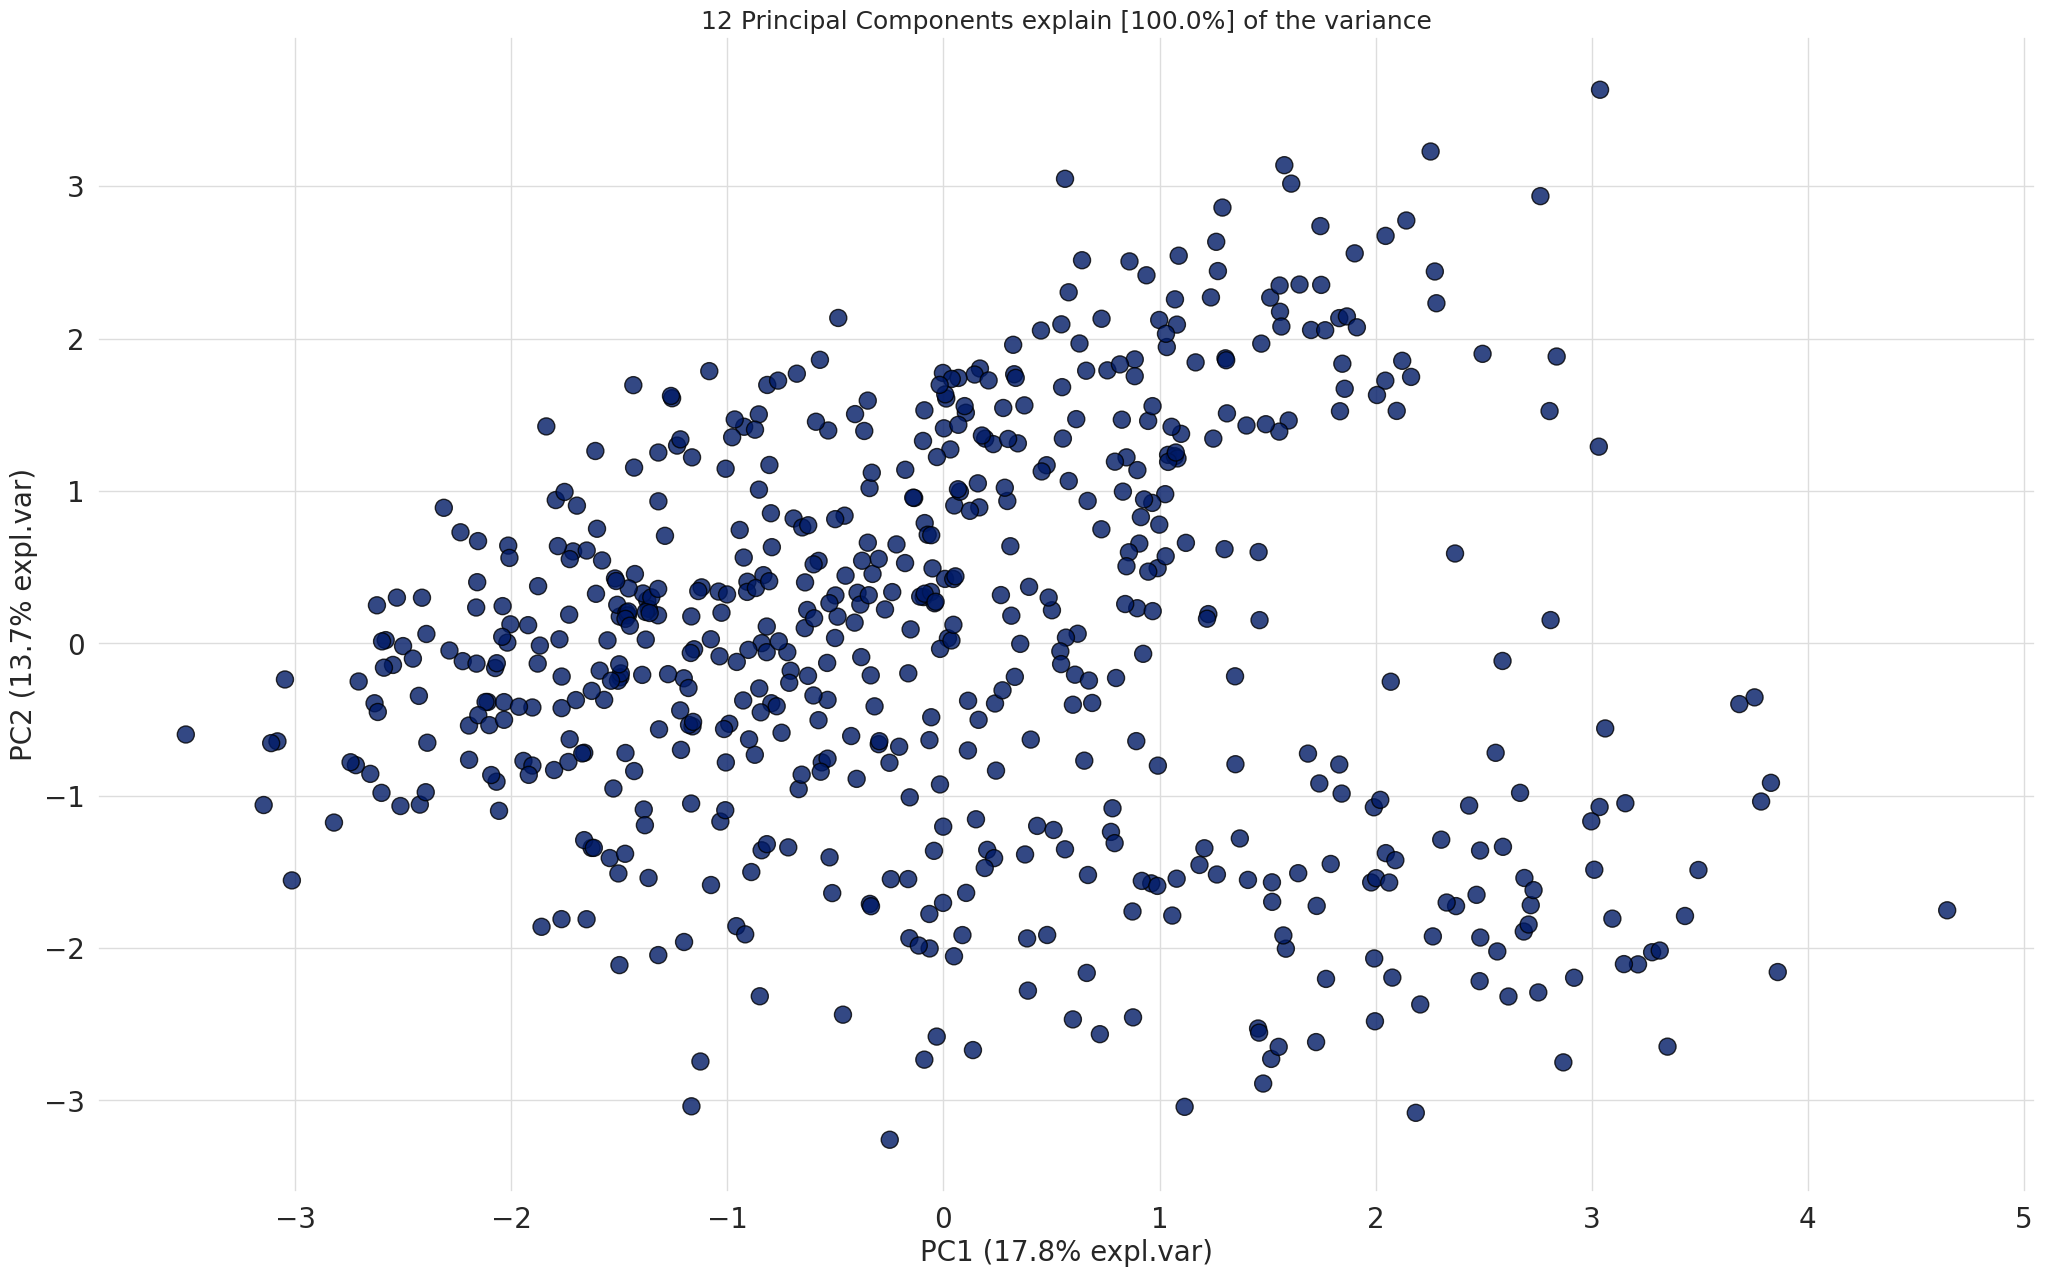

In [ ]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [ ]:
A = out['loadings'].T

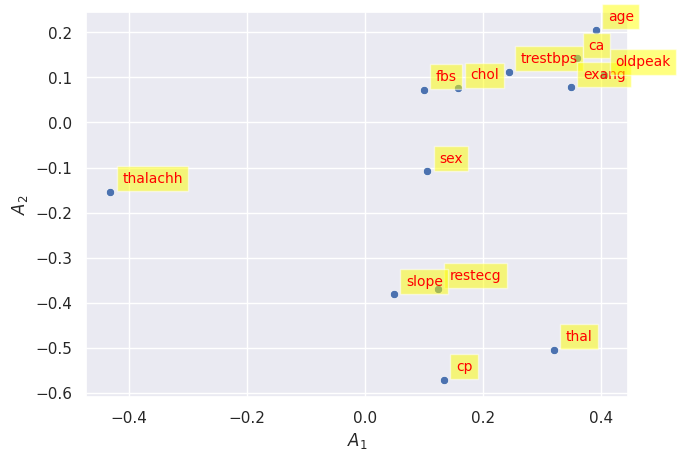

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

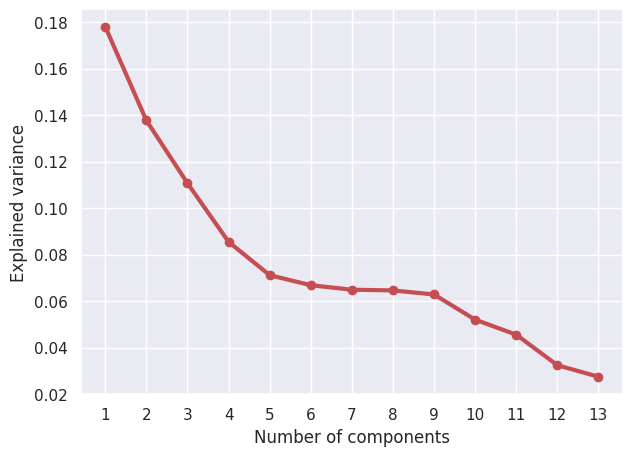

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

**Explained Variance Plot**

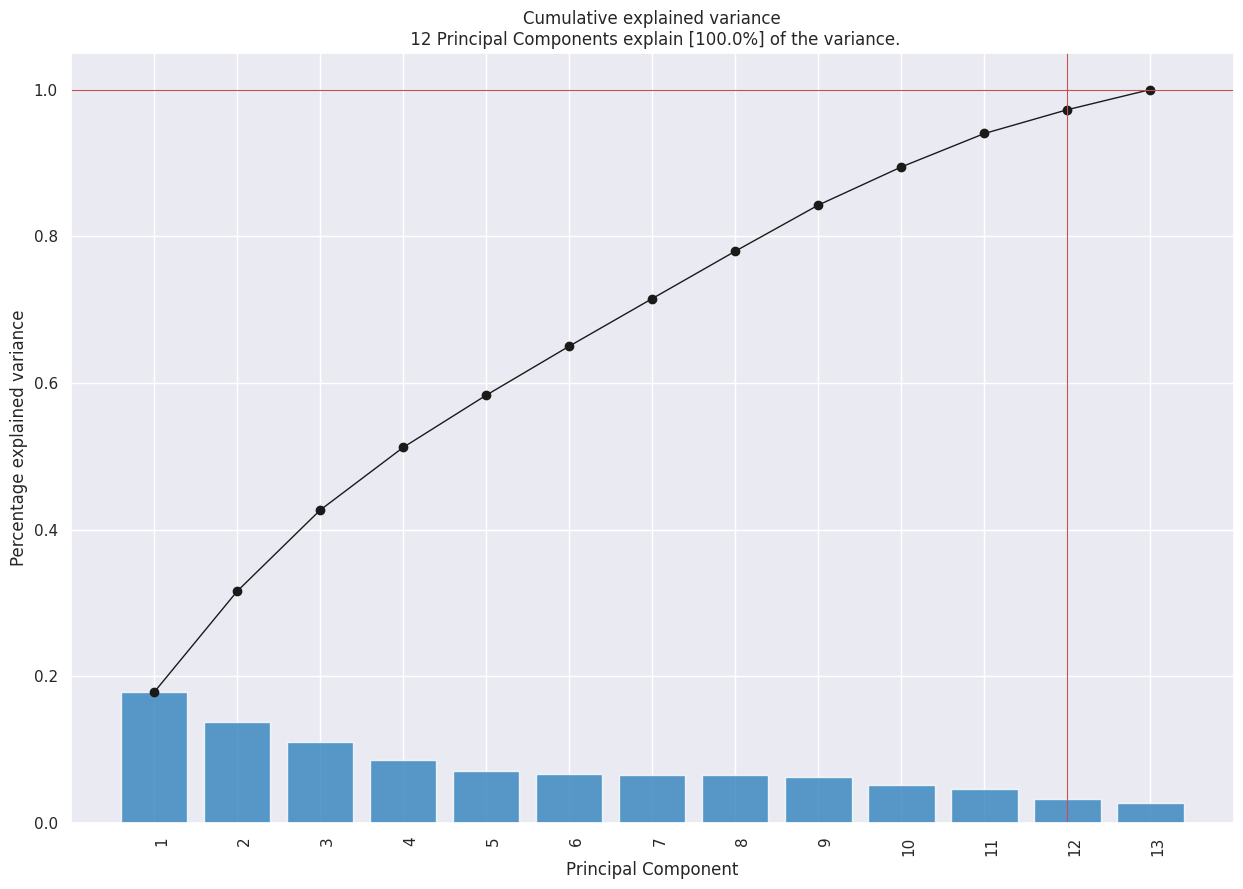

In [ ]:
model.plot();

**Biplot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '12 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (17.8% expl.var)', ylabel='PC2 (13.7% expl.var)'>)

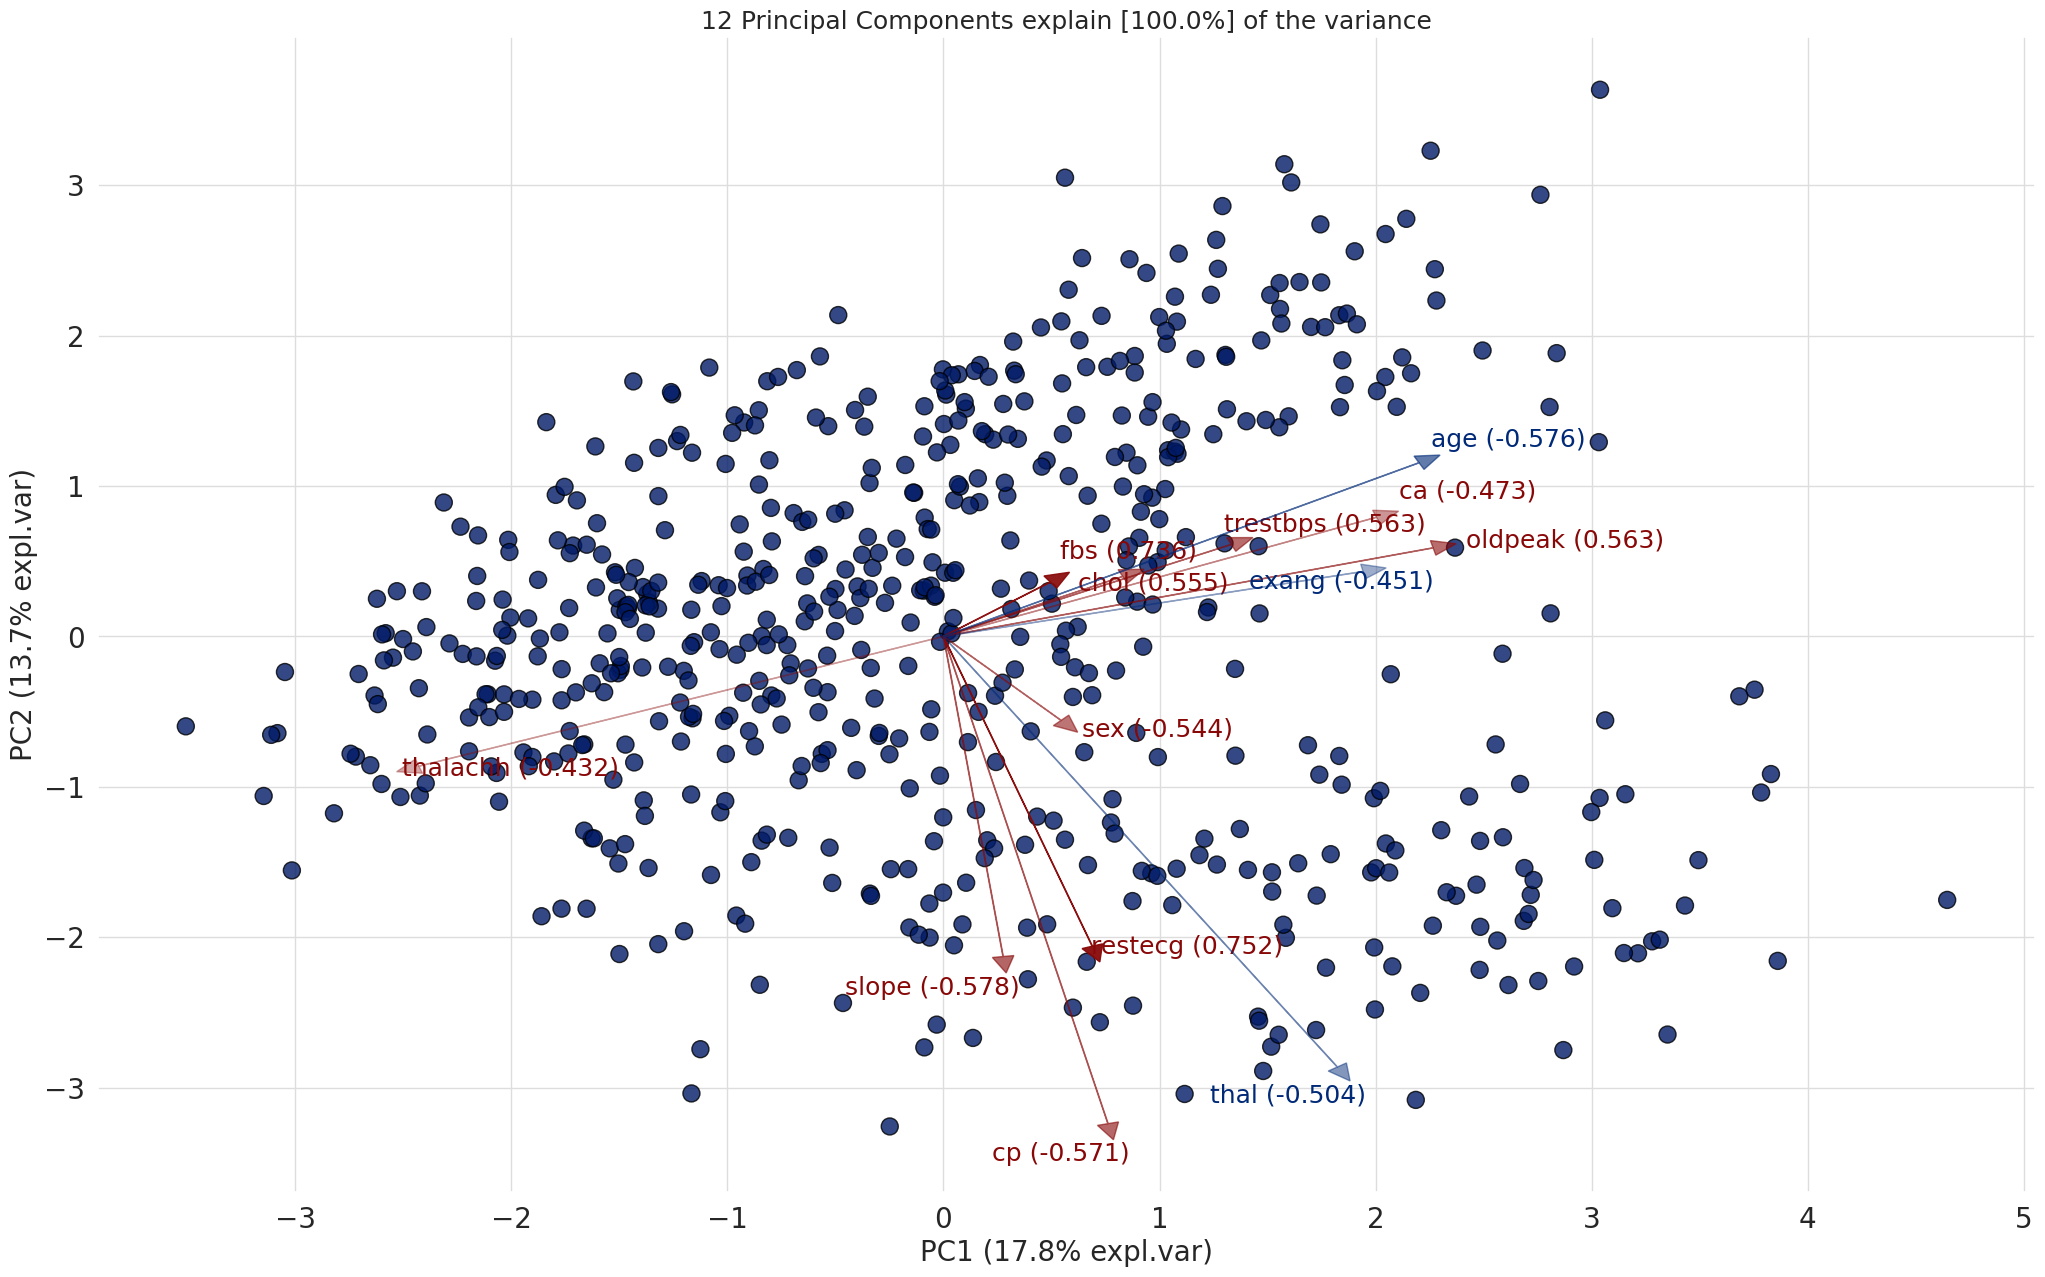

In [ ]:
model.biplot(label=False, legend=False)

# Multiclass Classification with PyCaret

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Data Splitting**

In order to demonstrate the predict_model() function on unseen data, a sample of 60 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 60 records were not available at the time when the machine learning experiment was performed.

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (542, 14)
Unseen Data For Predictions: (60, 14)


**Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline.

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='target', train_size=0.7, session_id=123)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(542, 14)"
4,Transformed data shape,"(542, 14)"
5,Transformed train set shape,"(379, 14)"
6,Transformed test set shape,"(163, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


**Comparing all Machine Learning Models**

In [ ]:
#show the best model and their statistics
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8309,0.8951,0.8140,0.8355,0.8205,0.6607,0.6662,0.2160
et,Extra Trees Classifier,0.8284,0.9041,0.8196,0.8323,0.8198,0.6557,0.6636,0.3330
gbc,Gradient Boosting Classifier,0.8255,0.8899,0.7971,0.8392,0.8117,0.6497,0.6567,0.1600
xgboost,Extreme Gradient Boosting,0.8203,0.8702,0.8143,0.8245,0.8111,0.6398,0.6491,0.2050
lightgbm,Light Gradient Boosting Machine,0.8150,0.8826,0.8251,0.8035,0.8096,0.6293,0.6359,0.1900
dt,Decision Tree Classifier,0.7544,0.7533,0.7480,0.7457,0.7435,0.5072,0.5122,0.0500
ada,Ada Boost Classifier,0.7410,0.7863,0.7383,0.7310,0.7328,0.4809,0.4834,0.1270
qda,Quadratic Discriminant Analysis,0.7176,0.7830,0.7374,0.7005,0.7152,0.4341,0.4388,0.0350
lr,Logistic Regression,0.7100,0.6928,0.6950,0.7071,0.6983,0.4185,0.4212,0.8380
ridge,Ridge Classifier,0.7100,0.6956,0.6950,0.7071,0.6983,0.4185,0.4212,0.0360


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

Decision Tree Classifier ('dt')
K Neighbors Classifier ('knn')
Logistic Regression ('lr')
There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**




In [ ]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6842,0.6806,0.6111,0.6875,0.6471,0.3631,0.3652
1,0.7632,0.7611,0.7222,0.7647,0.7429,0.5237,0.5244
2,0.7895,0.7861,0.7222,0.8125,0.7647,0.5754,0.5787
3,0.7105,0.7111,0.7222,0.6842,0.7027,0.4211,0.4216
4,0.7632,0.7639,0.7778,0.7368,0.7568,0.5263,0.5270
5,0.7105,0.7105,0.7895,0.6818,0.7317,0.4211,0.4264
6,0.8158,0.8158,0.7895,0.8333,0.8108,0.6316,0.6325
7,0.8684,0.8684,1.0000,0.7917,0.8837,0.7368,0.7638
8,0.7632,0.7632,0.7895,0.7500,0.7692,0.5263,0.5270


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
#trained model object is stored in the variable 'dt'.
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

**Tune a Model**: How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [ ]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8158,0.8333,0.7222,0.8667,0.7879,0.6275,0.6356
1,0.8158,0.8194,0.7778,0.8235,0.8000,0.6295,0.6304
2,0.8158,0.8722,0.6111,1.0000,0.7586,0.6232,0.6728
3,0.8684,0.8389,0.8333,0.8824,0.8571,0.7354,0.7364
4,0.7895,0.8222,0.7778,0.7778,0.7778,0.5778,0.5778
5,0.7368,0.8504,0.8947,0.6800,0.7727,0.4737,0.4992
6,0.8158,0.8199,0.8421,0.8000,0.8205,0.6316,0.6325
7,0.7368,0.8227,0.6316,0.8000,0.7059,0.4737,0.4845
8,0.7632,0.8144,0.8421,0.7273,0.7805,0.5263,0.5330


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
#tuned model object is stored in the variable 'tuned_dt'.
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_samples_leaf=5,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

**Evaluate Decision Tree Model**





How to analyze model performance using various plots

In [ ]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create K Neighbors Model**

In [ ]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5263,0.5181,0.5556,0.5000,0.5263,0.0552,0.0556
1,0.4474,0.3847,0.3333,0.4000,0.3636,-0.1176,-0.1192
2,0.4474,0.3931,0.4444,0.4211,0.4324,-0.1053,-0.1054
3,0.3947,0.3875,0.2778,0.3333,0.3030,-0.2241,-0.2270
4,0.3684,0.3278,0.3333,0.3333,0.3333,-0.2667,-0.2667
5,0.4211,0.4072,0.2632,0.3846,0.3125,-0.1579,-0.1664
6,0.5263,0.5055,0.5263,0.5263,0.5263,0.0526,0.0526
7,0.3158,0.3033,0.3158,0.3158,0.3158,-0.3684,-0.3684
8,0.3421,0.3573,0.3684,0.3500,0.3590,-0.3158,-0.3162


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune K Neighbors Model**

In [ ]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5789,0.5444,0.5000,0.5625,0.5294,0.1508,0.1517
1,0.3684,0.3750,0.1667,0.2500,0.2000,-0.2881,-0.3043
2,0.4737,0.4139,0.3889,0.4375,0.4118,-0.0615,-0.0618
3,0.4737,0.4764,0.4444,0.4444,0.4444,-0.0556,-0.0556
4,0.4211,0.4056,0.2222,0.3333,0.2667,-0.1808,-0.1910
5,0.5789,0.5125,0.3158,0.6667,0.4286,0.1579,0.1857
6,0.5789,0.6357,0.3158,0.6667,0.4286,0.1579,0.1857
7,0.4737,0.5055,0.4211,0.4706,0.4444,-0.0526,-0.0529
8,0.4474,0.3837,0.3684,0.4375,0.4000,-0.1053,-0.1066


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate K Neighbors Model**

In [ ]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create Logistic Regression Model**

In [ ]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6316,0.5639,0.5000,0.6429,0.5625,0.2528,0.2588
1,0.6842,0.6833,0.7778,0.6364,0.7000,0.3736,0.3820
2,0.6316,0.6278,0.6111,0.6111,0.6111,0.2611,0.2611
3,0.7895,0.7917,0.7222,0.8125,0.7647,0.5754,0.5787
4,0.7368,0.6583,0.7222,0.7222,0.7222,0.4722,0.4722
5,0.7368,0.7341,0.7368,0.7368,0.7368,0.4737,0.4737
6,0.8158,0.8864,0.8421,0.8000,0.8205,0.6316,0.6325
7,0.6842,0.6870,0.6316,0.7059,0.6667,0.3684,0.3705
8,0.6053,0.5180,0.6842,0.5909,0.6341,0.2105,0.2132


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Tune Logistic Regression Model**

In [ ]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6316,0.5611,0.5000,0.6429,0.5625,0.2528,0.2588
1,0.6842,0.6833,0.7778,0.6364,0.7000,0.3736,0.3820
2,0.6316,0.6306,0.6111,0.6111,0.6111,0.2611,0.2611
3,0.7895,0.7889,0.7222,0.8125,0.7647,0.5754,0.5787
4,0.7368,0.6611,0.7222,0.7222,0.7222,0.4722,0.4722
5,0.7368,0.7368,0.7368,0.7368,0.7368,0.4737,0.4737
6,0.8158,0.8864,0.8421,0.8000,0.8205,0.6316,0.6325
7,0.6842,0.6898,0.6316,0.7059,0.6667,0.3684,0.3705
8,0.6053,0.5208,0.6842,0.5909,0.6341,0.2105,0.2132


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Evaluate Logistic Regression Model**

In [ ]:
tuned_lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create Random Forest Model**

In [ ]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8421,0.8792,0.8333,0.8333,0.8333,0.6833,0.6833
1,0.8684,0.8764,0.9444,0.8095,0.8718,0.7383,0.7476
2,0.7895,0.9153,0.6667,0.8571,0.7500,0.5730,0.5866
3,0.8684,0.9139,0.8333,0.8824,0.8571,0.7354,0.7364
4,0.7895,0.8597,0.7778,0.7778,0.7778,0.5778,0.5778
5,0.8684,0.9432,0.9474,0.8182,0.8780,0.7368,0.7462
6,0.8158,0.9238,0.8421,0.8000,0.8205,0.6316,0.6325
7,0.8421,0.9169,0.8421,0.8421,0.8421,0.6842,0.6842
8,0.8684,0.8961,0.8421,0.8889,0.8649,0.7368,0.7379


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Random Forest Model**

In [ ]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7895,0.8694,0.7778,0.7778,0.7778,0.5778,0.5778
1,0.8158,0.8694,0.8889,0.7619,0.8205,0.6336,0.6416
2,0.8421,0.9361,0.7222,0.9286,0.8125,0.6798,0.6958
3,0.8421,0.9250,0.7778,0.8750,0.8235,0.6816,0.6854
4,0.7895,0.8583,0.7778,0.7778,0.7778,0.5778,0.5778
5,0.8158,0.9612,0.9474,0.7500,0.8372,0.6316,0.6547
6,0.8158,0.9224,0.8421,0.8000,0.8205,0.6316,0.6325
7,0.8421,0.9391,0.8421,0.8421,0.8421,0.6842,0.6842
8,0.8158,0.9086,0.7895,0.8333,0.8108,0.6316,0.6325


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Evaluate Random Forest Model**

In [ ]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7895,0.8694,0.7778,0.7778,0.7778,0.5778,0.5778
1,0.8158,0.8694,0.8889,0.7619,0.8205,0.6336,0.6416
2,0.8421,0.9361,0.7222,0.9286,0.8125,0.6798,0.6958
3,0.8421,0.9250,0.7778,0.8750,0.8235,0.6816,0.6854
4,0.7895,0.8583,0.7778,0.7778,0.7778,0.5778,0.5778
5,0.8158,0.9612,0.9474,0.7500,0.8372,0.6316,0.6547
6,0.8158,0.9224,0.8421,0.8000,0.8205,0.6316,0.6325
7,0.8421,0.9391,0.8421,0.8421,0.8421,0.6842,0.6842
8,0.8158,0.9086,0.7895,0.8333,0.8108,0.6316,0.6325


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **Classification + PCA**

In [ ]:
clf_pca = setup(data=df, target='target', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(602, 14)"
4,Transformed data shape,"(602, 4)"
5,Transformed train set shape,"(421, 4)"
6,Transformed test set shape,"(181, 4)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.7101,0.7987,0.6952,0.7038,0.6964,0.4194,0.4225,0.0830
knn,K Neighbors Classifier,0.6556,0.7347,0.6955,0.6429,0.6625,0.3116,0.3179,0.1610
et,Extra Trees Classifier,0.6535,0.7182,0.6607,0.6433,0.6482,0.3056,0.3089,0.2920
lightgbm,Light Gradient Boosting Machine,0.6391,0.7087,0.6507,0.6327,0.6360,0.2771,0.2825,0.5670
rf,Random Forest Classifier,0.6368,0.7247,0.6210,0.6272,0.6198,0.2714,0.2752,0.4300
gbc,Gradient Boosting Classifier,0.6318,0.7238,0.6107,0.6221,0.6123,0.2613,0.2644,0.1640
nb,Naive Bayes,0.6225,0.6940,0.6069,0.6079,0.6055,0.2435,0.2451,0.0550
xgboost,Extreme Gradient Boosting,0.6225,0.6991,0.6210,0.6210,0.6153,0.2433,0.2480,0.1390
dt,Decision Tree Classifier,0.6059,0.6052,0.5931,0.5989,0.5932,0.2105,0.2122,0.0430
lr,Logistic Regression,0.5985,0.6493,0.5621,0.5820,0.5680,0.1938,0.1955,0.0770


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
best_model_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7442,0.7468,0.8095,0.7083,0.7556,0.4898,0.4946
1,0.7857,0.8571,0.8095,0.7727,0.7907,0.5714,0.5721
2,0.8571,0.9206,0.9048,0.8261,0.8636,0.7143,0.7175
3,0.5952,0.7438,0.5238,0.6111,0.5641,0.1905,0.1925
4,0.6667,0.7727,0.7500,0.6250,0.6818,0.3378,0.3441
5,0.7143,0.8409,0.7500,0.6818,0.7143,0.4299,0.4318
6,0.6190,0.6795,0.6000,0.6000,0.6000,0.2364,0.2364
7,0.7143,0.8068,0.7000,0.7000,0.7000,0.4273,0.4273
8,0.6905,0.8386,0.5500,0.7333,0.6286,0.3724,0.3838


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_best_model_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Explainable AI with Shapley values
Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [ ]:
rf_pca = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5581,0.6569,0.6190,0.5417,0.5778,0.1187,0.1198
1,0.7143,0.7948,0.7143,0.7143,0.7143,0.4286,0.4286
2,0.7381,0.8401,0.8571,0.6923,0.7660,0.4762,0.4903
3,0.6429,0.6837,0.6190,0.6500,0.6341,0.2857,0.2860
4,0.6190,0.6875,0.6000,0.6000,0.6000,0.2364,0.2364
5,0.6190,0.7830,0.7000,0.5833,0.6364,0.2432,0.2477
6,0.5000,0.5659,0.4000,0.4706,0.4324,-0.0092,-0.0092
7,0.6667,0.7511,0.5000,0.7143,0.5882,0.3226,0.3371
8,0.6905,0.7989,0.6000,0.7059,0.6486,0.3753,0.3792


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_rf_pca = tune_model(rf_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5581,0.6255,0.6190,0.5417,0.5778,0.1187,0.1198
1,0.6667,0.7823,0.8095,0.6296,0.7083,0.3333,0.3478
2,0.7143,0.9138,0.9048,0.6552,0.7600,0.4286,0.4635
3,0.6905,0.7256,0.7619,0.6667,0.7111,0.3810,0.3849
4,0.5952,0.6568,0.5500,0.5789,0.5641,0.1868,0.1870
5,0.7143,0.8409,0.8500,0.6538,0.7391,0.4350,0.4534
6,0.5476,0.5659,0.5500,0.5238,0.5366,0.0952,0.0953
7,0.6905,0.7614,0.6500,0.6842,0.6667,0.3781,0.3786
8,0.6905,0.8227,0.6000,0.7059,0.6486,0.3753,0.3792


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples.

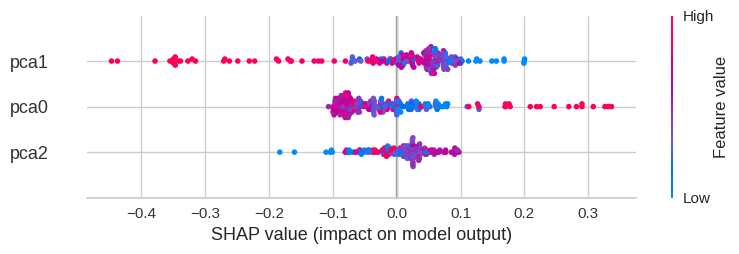

In [ ]:
interpret_model(tuned_rf_pca, plot='summary')

In [ ]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

**Visualize many predictions**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason')

In [4]:
!git config --global user.name "DivineIbuchim"
!git config --global user.email "anyalemechidivine@gmail.com"


In [7]:
!git clone https://github.com/DivineIbuchim/INSE_6220.git

Cloning into 'INSE_6220'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 18 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (18/18), 184.70 KiB | 2.31 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [8]:
!ls


INSE_6220  logs.log  sample_data


In [10]:
!mv INSE_6220.ipynb https://github.com/DivineIbuchim/INSE_6220.git/


mv: cannot stat 'INSE_6220.ipynb': No such file or directory


In [11]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [59]:
!ls /content/drive/MyDrive/Colab_Notebooks


INSE_6220.ipynb  test.ipynb


In [51]:
!ls /content/drive/MyDrive/Colab_Notebooks

ls: cannot access '/content/drive/MyDrive/Colab_Notebooks': No such file or directory


In [49]:
file_path = '/content/drive/MyDrive/Colab_Notebooks/INSE_6220.ipynb'
with open(file_path, 'r') as file:
    content = file.read()
print(content)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab_Notebooks/INSE_6220.ipynb'

In [63]:
!mv /content/drive/MyDrive/Colab_Notebooks DivineIbuchim/INSE_6220.git

mv: cannot move '/content/drive/MyDrive/Colab_Notebooks' to 'DivineIbuchim/INSE_6220.git': No such file or directory
